### 데이터셋 준비
- https://docs.google.com/uc?export=download&id=1sWf596Yy4GkBxPA9VEiETPXPU3eYfs3H
- 위 주소로 압축 파일 다운로드 후 압축 해제


In [ ]:
# 압축 해제된 폴더의 전체 데이터 업로드 (전체 이미지 선택 후 일괄 업로드)
from google.colab import files

uploaded = files.upload()

Saving apple1_gray.jpg to apple1_gray.jpg
Saving subject01.centerlight.jpg to subject01.centerlight.jpg
Saving subject01.happy.jpg to subject01.happy.jpg
Saving subject01.normal.jpg to subject01.normal.jpg
Saving subject02.normal.jpg to subject02.normal.jpg
Saving subject03.normal.jpg to subject03.normal.jpg
Saving subject07.centerlight.jpg to subject07.centerlight.jpg
Saving subject07.happy.jpg to subject07.happy.jpg
Saving subject07.normal.jpg to subject07.normal.jpg
Saving subject10.normal.jpg to subject10.normal.jpg
Saving subject11.centerlight.jpg to subject11.centerlight.jpg
Saving subject11.happy.jpg to subject11.happy.jpg
Saving subject11.normal.jpg to subject11.normal.jpg
Saving subject12.normal.jpg to subject12.normal.jpg
Saving subject14.happy.jpg to subject14.happy.jpg
Saving subject14.normal.jpg to subject14.normal.jpg
Saving subject14.sad.jpg to subject14.sad.jpg
Saving subject15.normal.jpg to subject15.normal.jpg


In [ ]:
# 파이썬 라이브러리 import
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import cv2

## Read Images

In [ ]:
dataset_path = './'
dataset_dir  = os.listdir(dataset_path)
dataset_dir = [img for img in dataset_dir if img.endswith(".jpg")]
dataset_dir = sorted(dataset_dir)

width  = 195
height = 231

Train Images:
Training tensor shape :  (8, 45045)


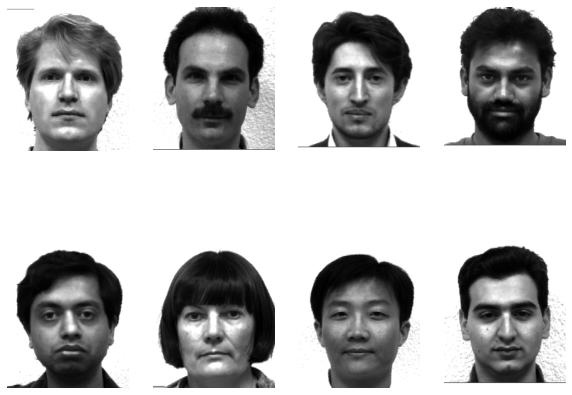

In [ ]:
print('Train Images:')
train_image_names = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 'subject07.normal.jpg', 'subject10.normal.jpg', 'subject11.normal.jpg', 'subject14.normal.jpg', 'subject15.normal.jpg']
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)
print('Training tensor shape : ', training_tensor.shape)

plt.figure(figsize=(10, 8))
for i in range(len(train_image_names)):
    img = plt.imread(dataset_path + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

Test Images:
Testing tensor shape :  (18, 45045)


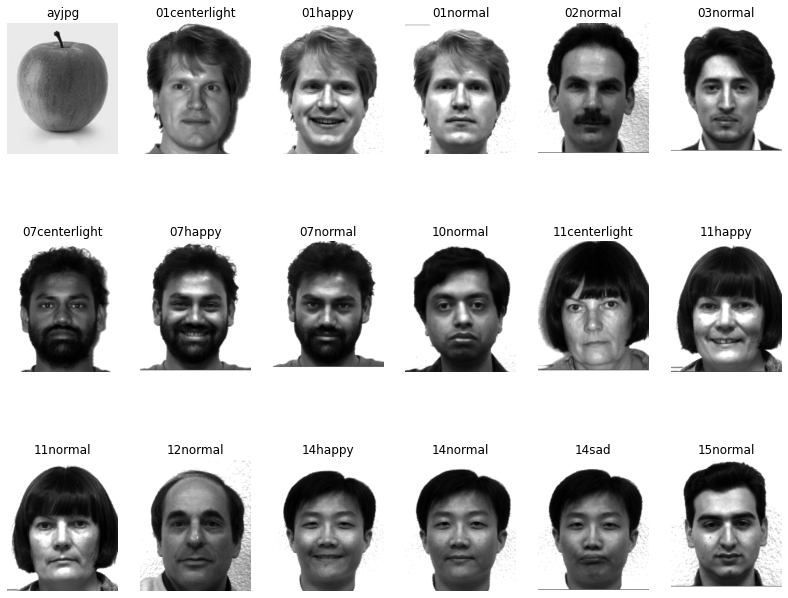

In [ ]:
print('Test Images:')
test_image_names = dataset_dir#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)
print('Testing tensor shape : ', testing_tensor.shape)

plt.figure(figsize=(10, 8))
for i in range(len(test_image_names)):
    img = imread(dataset_path + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,6,1+i)
    plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Mean face

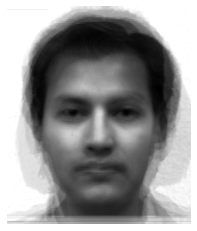

In [ ]:
# 모든 training face에 대한 mean face 이미지 생성
# training_tensor의 shape : (8, 45045) -> (training 이미지 개수, 이미지 height * 이미지 width)

# mean_face를 생성하는 코드를 작성하시오.
# training 이미지들의 평균을 구하여 만든 이미지이며 아래 출력과 같음.
mean_face = np.zeros((1,height*width))

# 코드 작성
mean_face = np.mean(training_tensor, axis=0)

# mean_face 출력
plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.axis('off')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Normalized face

In [ ]:
normalized_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

# normalized_training_tensor를 생성하는 코드를 작성하시오.
# training_tensor에서 각 training 이미지와 mean_face 이미지의 차를 (np.subtract) 이용해 nomalized face 이미지 획득
# 각 training image에 대한 normalized 이미지를 구한 뒤 normalized_training_tensor에 저장

# training_tensor shape : (8, 45045)
# mean_face shape : (1, 45045)
# normalized_training_tensor shape : (8, 45045)
# normalized_training_tensor의 출력은 아래 Display normalized faces와 같음.

# 코드 작성
normalized_training_tensor = np.subtract(training_tensor, mean_face)

### Display normalized faces

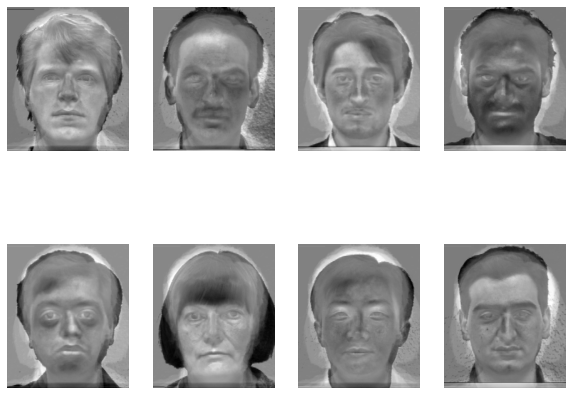

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(len(train_image_names)):
    img = normalized_training_tensor[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Covariance matrix

In [ ]:
# Normalized face 이미지들의 Convariance matrix 구하기
# normalized_training_tensor의 Covariance matrix cov_matrix를 구하는 코드를 작성하시오.
# 결과는 아래와 같음.
#np.cov
#np.divide 
#위의 두개의 함수 사용 가능

# 코드 작성
cov_matrix = np.divide(np.cov(normalized_training_tensor), len(normalized_training_tensor))
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 240.21425354  -54.37445049  -49.91300972 -167.04449305    6.71011608
    95.13549119   51.86167951 -122.58958706]
 [ -54.37445049  271.21637481  -39.69264581   66.46457924  -62.78262301
  -159.33970561  -96.7188796    75.22735047]
 [ -49.91300972  -39.69264581  223.857185     46.24225037  -32.6657127
  -134.1771553   -35.12864547   21.47773363]
 [-167.04449305   66.46457924   46.24225037  345.77440281  -80.00529939
  -267.06328206  -73.29909108  128.93093316]
 [   6.71011608  -62.78262301  -32.6657127   -80.00529939  256.35235515
   -63.58037876   53.02911913  -77.05757652]
 [  95.13549119 -159.33970561 -134.1771553  -267.06328206  -63.58037876
   747.14220277    1.26270451 -219.37987674]
 [  51.86167951  -96.7188796   -35.12864547  -73.29909108   53.02911913
     1.26270451  238.6557604  -139.66264741]
 [-122.58958706   75.22735047   21.47773363  128.93093316  -77.05757652
  -219.37987674 -139.66264741  333.05367046]]


In [ ]:
# 위에서 구한 Covariance matrix를 이용해 Eigenvalue, Eigenvector 구하기
# cov_matrix를 이용하여 eigenvalues, eigenvectors를 구하는 코드를 작성하시오.
# 결과는 아래와 같음.
#np.linalg.eig 사용

# 코드 작성
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

# Eigenvalue, Eigenvector 쌍을 가진 list eig_pairs를 생성하고 list를 내림차순으로 정렬하여
# list eigvalues_sort, eigvectors_sort를 생성하는 코드를 작성하시오.
idx = np.argsort(eigenvalues)[::-1]
eigvectors_sort = eigenvectors[:,idx]
eigvalues_sort = eigenvalues[idx]

Eigenvectors of Cov(X): 
[[-0.24216786  0.23304127  0.35355339 -0.54650028  0.34900164  0.24263134
  -0.46008264 -0.26652539]
 [ 0.2320557  -0.21004915  0.35355339  0.28336041  0.66156373 -0.40750816
   0.14797794 -0.26666354]
 [ 0.15104702  0.0756895   0.35355339  0.19555006 -0.49779746 -0.46987952
  -0.57605919 -0.08822017]
 [ 0.41563654 -0.18098142  0.35355339 -0.49133856 -0.36828479  0.0496277
   0.45683638 -0.28510056]
 [-0.05114387  0.48868195  0.35355339 -0.17720876  0.0789403  -0.29622126
   0.28068609  0.65529232]
 [-0.73015769 -0.53226997  0.35355339  0.03110374 -0.15710617 -0.06932017
   0.14579398  0.08274941]
 [-0.14350419  0.47101419  0.35355339  0.52641965 -0.14266291  0.41459652
   0.25325285 -0.31472933]
 [ 0.36823436 -0.34512637  0.35355339  0.17861375  0.07634566  0.53607356
  -0.2484054   0.48319727]]

Eigenvalues of Cov(X): 
[ 1.11554951e+03  4.85892625e+02 -2.14410939e-14  1.22955135e+02
  2.95284929e+02  1.76427142e+02  2.32097712e+02  2.28059153e+02]


## Find cumulative variance of each Principal component

Cumulative proportion of variance explained vector: 
[0.41996901757133753, 0.6028921838096211, 0.7140575967297826, 0.8014350259883284, 0.8872920656184803, 0.9537112902047735, 1.0, 1.0]


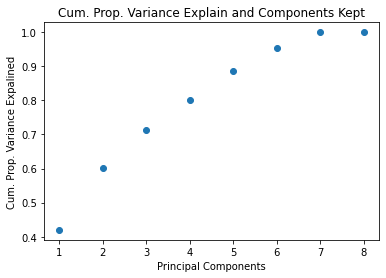

In [ ]:
# Eigenvalue를 이용해 각 성분의 분산의 누적 비율을 (var_comp_sum) 계산하는 코드를 작성하시오.
# 결과는 아래와 같음.

# 코드 작성
total_evals=sum(eigvalues_sort)
var_comp_sum = [(sum(eigvalues_sort[:c])/total_evals) for c in range(1,len(eigvalues_sort)+1)]

# 각 성분들에 분산의 누적 비율
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

### Choose the necessary no.of principal components:

In [ ]:
reduced_data = np.array(eigvectors_sort[:8]).transpose()
reduced_data.shape  

(8, 8)

In [ ]:
# Eigen space를 형성하는 projected 데이터 생성
# proj_data를 구하는 코드를 작성하시오.
# projected data는 training_tensor와 reduced_data를 내적하여 구함.
# proj_data를 구한 결과는 Plot eigen faces에서 보여줌.

# 코드 작성
proj_data = np.dot(reduced_data, training_tensor)[:7]


## Plot eigen faces

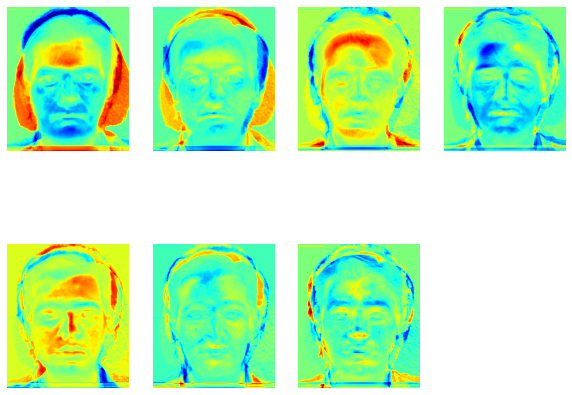

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.axis('off')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Finding weights for each traning image

In [ ]:
# normalized_training_tensor의 각 normalized face 이미지와 Eigen face 이미지를 내적 하여 
# 각 이미지에 대한 weghit w를 계산하는 코드를 작성하시오.
# 결과는 아래와 같음.

# 코드 작성
w = np.dot(normalized_training_tensor, proj_data.T)
print(w)

[[-8.48287612e+07  5.81765456e+07  4.32101930e+07 -7.76647463e+07
  -3.06341089e+07  3.58272786e+07 -3.53176153e+07]
 [ 8.90553605e+07 -4.26457404e+07  6.83431225e+07  2.56112699e+07
  -1.89660204e+07 -3.27984752e+07  1.63052275e+07]
 [ 6.49888673e+07  1.91766896e+07 -5.08976401e+07 -6.15416348e+07
  -1.02271740e+07 -2.29160969e+07  4.87793668e+06]
 [ 1.63772788e+08 -3.62801041e+07 -4.07933003e+07  4.85649446e+07
  -2.11225024e+07 -2.23707416e+06 -1.88350738e+07]
 [-2.50823074e+07  7.92886248e+07  6.20549912e+06  3.76311039e+07
   5.70068630e+07 -2.62025963e+07 -3.84041861e+06]
 [-3.03507468e+08 -1.07059520e+08 -2.15641534e+07  4.34624113e+07
   1.37673278e+07 -2.06872576e+07  1.02386688e+07]
 [-5.73401449e+07  8.29527225e+07 -1.50118335e+07  2.00947251e+07
  -2.61070419e+07  2.69240539e+07  2.30162486e+07]
 [ 1.52941665e+08 -5.36092179e+07  1.05081126e+07 -3.61580737e+07
   3.62826568e+07  4.20901677e+07  3.55502602e+06]]


## Now we recognize unknown face!

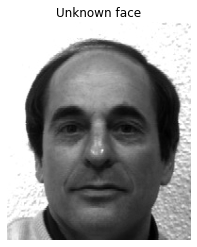

In [ ]:
unknown_face        = plt.imread('./subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.axis('off')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Normalize unknown face

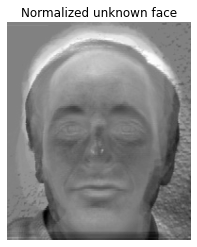

In [ ]:
# 위의 normalize 방법을 이용하여 unknown face에 대한
# normalized face인 normalized_uface_vector를 구하시오.
# 결과는 아래와 같음.

# 코드 작성
normalized_uface_vector = np.subtract(unknown_face_vector, mean_face)

plt.imshow(normalized_uface_vector.reshape(height, width), cmap='gray')
plt.axis('off')
plt.title('Normalized unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Wieghts of unknown face

Projecting the normalized vector onto the eigenspace, to find out the weights:

In [ ]:
# proj_data : 위에서 구한 Training의 eigen face 이미지
# unknown face 이미지와 training eigen face 이미지를 내적해
# unknown 이미지의 weight w_unknown을 계산하는 코드를 작성하시오.
# 결과는 아래와 같음.

# 코드 작성
w_unknown = np.dot(proj_data, unknown_face_vector)
print(w_unknown)

[ 4.70038929e+07  1.65543498e+08  2.16510446e+07 -1.60182424e+08
 -3.66812704e+07  9.24751216e+07 -3.78133854e+07]


Finding the $min|W - W_{unknown}|$


In [ ]:
# training 이미지들의 weight와 unknown 이미지 weight 차이 'diff'를 계산하는 코드를 작성
# L1 norm값들을 가진 'norms'를 구하여 출력
# norms 중 최소값을 출력
# 결과는 아래와 같음.

# 코드 작성
diff = np.subtract(w, w_unknown)
norm = np.linalg.norm(diff, axis=1)
print(norm)
print(min(norm))

[1.98578071e+08 3.17406144e+08 2.29297886e+08 3.33789084e+08
 2.75719259e+08 5.08103510e+08 2.44257922e+08 2.90397405e+08]
198578071.0007428


## Reconizing all test images

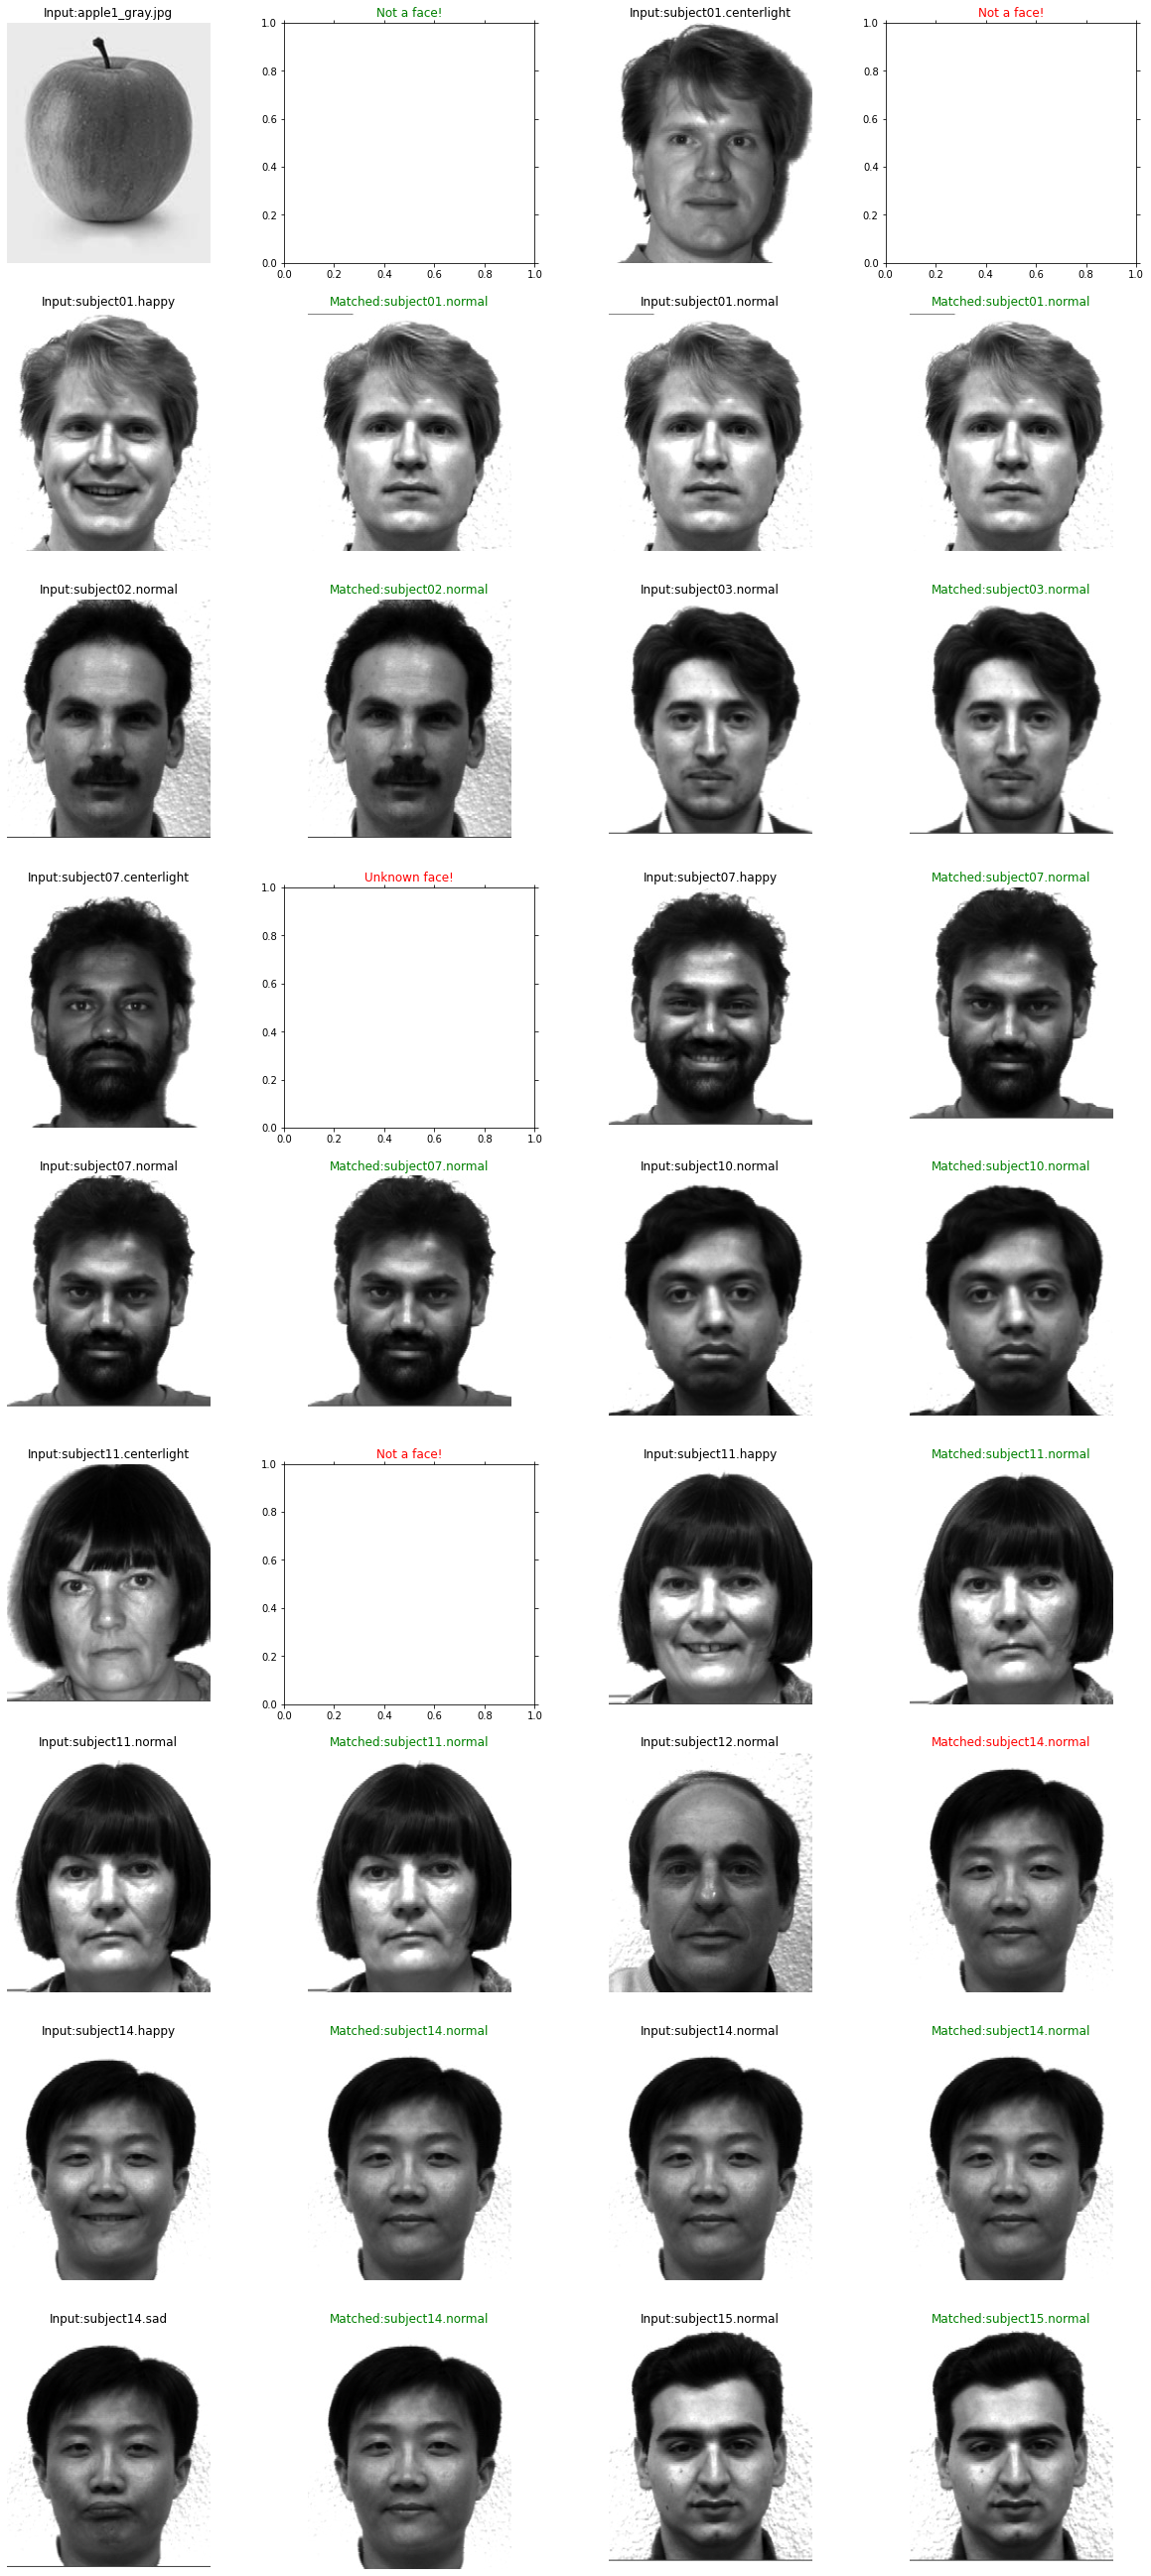

Correct predictions: 14/18 = 77.77777777777779%


In [ ]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread('./'+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalized_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.axis('off')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalized_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    #t1 = 200535910.268 # working with 6 faces
    #t0 = 86528212
    t0 = 88831687
    #t0 = 143559033 # working with 6 faces
    
    if norms[index] < t1:
        plt.subplot(9,4,1+count)
        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread('./'+train_image_names[index]), cmap='gray')
                plt.axis('off')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread('./'+train_image_names[index]), cmap='gray')
                plt.axis('off')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(9,4,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

## Normalized images

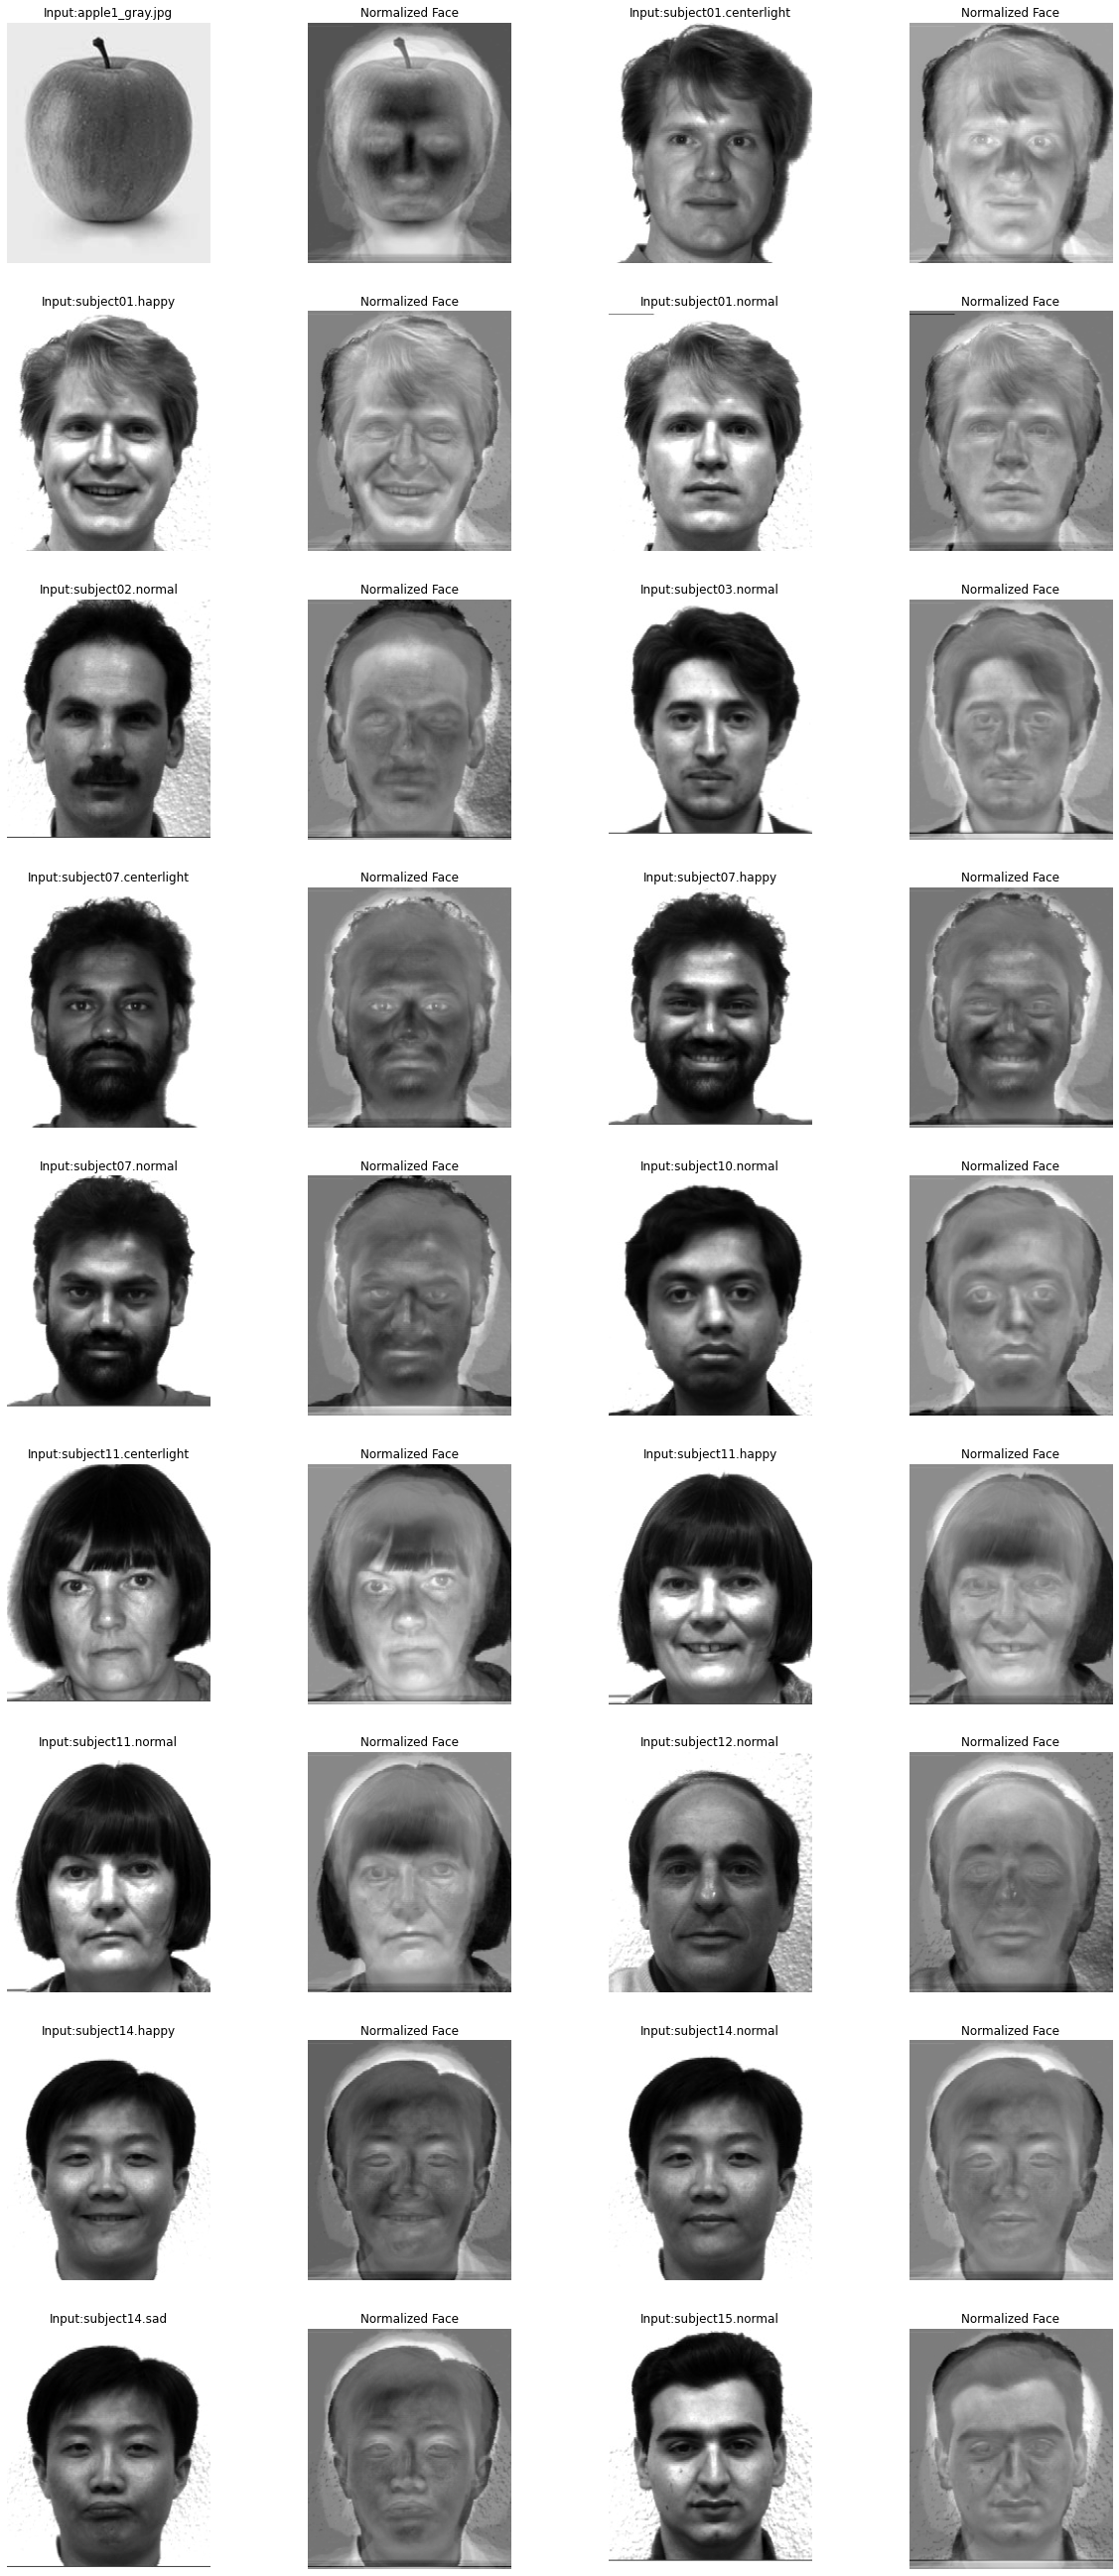

In [ ]:
count        = 0
def recogniser(img, train_image_names,proj_data,w):
    global count
    unknown_face        = plt.imread('./'+img)
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalized_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.axis('off')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    plt.subplot(9,4,1+count)
    plt.imshow(normalized_uface_vector.reshape(height, width), cmap='gray')
    plt.axis('off')
    plt.title('Normalized Face')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=2.5)
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()